In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

# adjust pandas display
pd.set_option("max_rows", 100)
pd.set_option("max_columns", 100)

# visualization libraries
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

import seaborn as sns

In [2]:
# load the data
raw_data = pd.read_csv("./data/survey_results_public.csv")

raw_data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [3]:
# all the columns in the data
raw_data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
# raw_data.info()

In [5]:
raw_data.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [6]:
raw_data['Country'].value_counts(normalize=True)

United States                         0.194609
India                                 0.131149
United Kingdom                        0.060807
Germany                               0.060713
Canada                                0.034196
                                        ...   
Mali                                  0.000016
Micronesia, Federated States of...    0.000016
Liechtenstein                         0.000016
Kiribati                              0.000016
Gabon                                 0.000016
Name: Country, Length: 183, dtype: float64

In [7]:
def cal_missing_val(df: pd.DataFrame) -> pd.DataFrame:
    """
    It calculates the percentage of missing values and returns a dataframe.
    """
    missing_percent = (df.isna().sum() / len(df)).mul(100)   # multiply by 100
    missing_df = pd.DataFrame(data=missing_percent, columns=["Percent_Missing (%)"])  # convert to dataframe
    missing_df = missing_df.sort_values(by="Percent_Missing (%)", ascending=False)    # sort the values in descending order
    
    return missing_df

In [8]:
# select the columns to use
cols = "Country EdLevel DevType Employment WorkWeekHrs YearsCodePro ConvertedComp".split(" ")
cols

['Country',
 'EdLevel',
 'DevType',
 'Employment',
 'WorkWeekHrs',
 'YearsCodePro',
 'ConvertedComp']

In [9]:
df = raw_data.copy()
df = df[cols]

df.head()

,Country,EdLevel,DevType,Employment,WorkWeekHrs,YearsCodePro,ConvertedComp
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, desktop or enterprise applications;...","Independent contractor, freelancer, or self-em...",50.0,27,NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, mobile",Employed full-time,NaN,4,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,40.0,4,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Employed full-time,NaN,8,NaN


In [10]:
# filter out all the columns without "ConvertedComp"
df1 = df[df['ConvertedComp'].notna()]
df1

,Country,EdLevel,DevType,Employment,WorkWeekHrs,YearsCodePro,ConvertedComp
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, desktop or ente...",Employed full-time,39.0,13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Database administrator;Developer, full-stack;D...",Employed full-time,36.0,4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, desktop or ente...",Employed full-time,40.0,2,40070.0
11,Spain,Some college/university study without earning ...,"Designer;Developer, front-end",Employed full-time,40.0,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...","Designer;Developer, back-end",Employed full-time,36.0,20,38916.0
...,...,...,...,...,...,...,...
64142,Nigeria,"Secondary school (e.g. American high school, G...","Academic researcher;Developer, back-end;Educator",Employed part-time,4.0,2,984.0
64148,Colombia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, QA or test",Employed full-time,40.0,5,19428.0
64152,United States,Some college/university study without earning ...,"Developer, back-end;Developer, front-end;Devel...",Employed full-time,NaN,20,200.0
64153,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, QA or test;Sy...",Employed full-time,45.0,3,15048.0


In [11]:
# remove the missing values in 'DevType'
df1 = df1.dropna(subset=['DevType'])

df1

,Country,EdLevel,DevType,Employment,WorkWeekHrs,YearsCodePro,ConvertedComp
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, desktop or ente...",Employed full-time,39.0,13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Database administrator;Developer, full-stack;D...",Employed full-time,36.0,4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, desktop or ente...",Employed full-time,40.0,2,40070.0
11,Spain,Some college/university study without earning ...,"Designer;Developer, front-end",Employed full-time,40.0,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...","Designer;Developer, back-end",Employed full-time,36.0,20,38916.0
...,...,...,...,...,...,...,...
64142,Nigeria,"Secondary school (e.g. American high school, G...","Academic researcher;Developer, back-end;Educator",Employed part-time,4.0,2,984.0
64148,Colombia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, QA or test",Employed full-time,40.0,5,19428.0
64152,United States,Some college/university study without earning ...,"Developer, back-end;Developer, front-end;Devel...",Employed full-time,NaN,20,200.0
64153,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, QA or test;Sy...",Employed full-time,45.0,3,15048.0


In [12]:
df2 = df1.copy()

# clean the 'DevType'
df2['DevType'] = df2['DevType'].str.replace(',', ' ')

In [13]:
def clean_devtype(descrptn: 'str separated by ;') -> str:
    role = descrptn.split(";")[0]    # select the 1st split
    return role

In [14]:
df2['DevType'] = df2['DevType'].apply(clean_devtype)

# remove the excessive whitespaces
df2['DevType'] = df2['DevType'].str.replace("  ", " ")
df2

,Country,EdLevel,DevType,Employment,WorkWeekHrs,YearsCodePro,ConvertedComp
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Developer back-end,Employed full-time,39.0,13,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Database administrator,Employed full-time,36.0,4,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Developer back-end,Employed full-time,40.0,2,40070.0
11,Spain,Some college/university study without earning ...,Designer,Employed full-time,40.0,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",Designer,Employed full-time,36.0,20,38916.0
...,...,...,...,...,...,...,...
64142,Nigeria,"Secondary school (e.g. American high school, G...",Academic researcher,Employed part-time,4.0,2,984.0
64148,Colombia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Developer QA or test,Employed full-time,40.0,5,19428.0
64152,United States,Some college/university study without earning ...,Developer back-end,Employed full-time,NaN,20,200.0
64153,Chile,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Developer full-stack,Employed full-time,45.0,3,15048.0


In [15]:
for (col, dtype) in zip(df2.columns, df2.dtypes):
    if dtype == 'O':
        val = df2[col].value_counts()
        print(f"{col}: \n{val}")
        print("===" * 40)

Country: 
United States                       8038
India                               2635
United Kingdom                      2539
Germany                             2295
Canada                              1324
                                    ... 
Yemen                                  1
Turkmenistan                           1
Belize                                 1
Saint Vincent and the Grenadines       1
Grenada                                1
Name: Country, Length: 159, dtype: int64
EdLevel: 
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          16708
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        8560
Some college/university study without earning a degree                                 4047
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1448
Associate degree (A.A., A.S., etc.)                                                    1151
Other doctoral degree (Ph.D.

In [16]:
def assign_devtype(devtype: str) -> str:
    """This function tidies up the job titles."""
    if devtype == 'Developer back-end':
        return 'Backend Developer'
    
    elif devtype == 'Developer full-stack':
        return 'Fullstack Developer'
    
    elif devtype == 'Database administrator':
        return 'Database Administrator'
    
    elif devtype == 'Data or business analyst':
        return 'Data/Business Analyst'
    
    elif devtype == 'Developer front-end':
        return 'Frontend Developer'
    
    elif (devtype == 'Academic researcher') or (devtype =='Scientist') or (devtype =='Educator'): 
        return 'Academic Researcher/Scientist'
    
    elif devtype == 'Designer':
        return 'Designer'
    
    elif devtype == 'Developer desktop or enterprise applications':
        return 'Desktop/Enterprise Applications Developer'
    
    elif devtype == 'Data scientist or machine learning specialist':
        return 'Data scientist/Machine Learning Specialist'
    
    elif devtype == 'Developer mobile':
        return 'Mobile Developer'
    
    elif devtype == 'Developer embedded applications or devices':
        return 'Embedded applications/devices Developer'
    
    elif devtype == 'DevOps specialist':
        return 'DevOps'
    
    elif devtype == 'Developer QA or test':
        return 'QA/Test Developer'
    
    elif devtype == 'Engineer data':
        return 'Data Engineer'
    
    elif devtype == 'Developer game or graphics':
        return 'Game/Graphics Developer'
    
    elif (devtype == 'Engineering manager') or (devtype =='Product manager'):
        return 'Engineering/Product Manager'
    
    else:
        return 'Others'

In [17]:
def edu_level(col: str) -> str:
    if col == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)":
        return "Bachelor’s Degree"
    
    elif col == "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)":
        return "Master’s Degree"
    
    elif col == "Other doctoral degree (Ph.D., Ed.D., etc.)":
        return "Post Grad"
    
    elif col == "Some college/university study without earning a degree":
        return "University Dropout"
    
    elif col == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":
        return "High School"
    
    elif (col == "Associate degree (A.A., A.S., etc.)") or (col == "Professional degree (JD, MD, etc.)"):
        return "Professional Degree"
    
    else:   # "Primary/elementary school", "I never completed any formal education"
        return "Less than High School"

In [18]:
# clean the DevType
df2['DevType'] = df2['DevType'].apply(assign_devtype)

# clean the EdLevel
df2['EdLevel'] = df2['EdLevel'].apply(edu_level)

In [19]:
df3 = df2.copy()

# Exclude respondent that are not "Employed full-time"
df3 = df3.loc[(df3["Employment"] == "Employed full-time")]

# top 19 countries by frequency
top_countries = [*df3["Country"].value_counts().index[:19]]

df3

,Country,EdLevel,DevType,Employment,WorkWeekHrs,YearsCodePro,ConvertedComp
7,United States,Bachelor’s Degree,Backend Developer,Employed full-time,39.0,13,116000.0
9,United Kingdom,Master’s Degree,Database Administrator,Employed full-time,36.0,4,32315.0
10,United Kingdom,Bachelor’s Degree,Backend Developer,Employed full-time,40.0,2,40070.0
11,Spain,University Dropout,Designer,Employed full-time,40.0,7,14268.0
12,Netherlands,High School,Designer,Employed full-time,36.0,20,38916.0
...,...,...,...,...,...,...,...
64135,Denmark,Bachelor’s Degree,Embedded applications/devices Developer,Employed full-time,8.0,4,38208.0
64148,Colombia,Bachelor’s Degree,QA/Test Developer,Employed full-time,40.0,5,19428.0
64152,United States,University Dropout,Backend Developer,Employed full-time,NaN,20,200.0
64153,Chile,Bachelor’s Degree,Fullstack Developer,Employed full-time,45.0,3,15048.0


In [20]:
def clean_country(col: str) -> str:
    top_countries = ['United States','Others','India','United Kingdom','Germany','Canada','Brazil','France','Spain',
    'Australia','Netherlands','Poland','Italy','Russian Federation','Sweden','Turkey','Israel','Switzerland','Pakistan']
    
    if col in top_countries:
        return col
    
    else:
        return "Others"

In [21]:
def clean_years_code_pro(num: float) -> float:
    if num == "Less than 1 year":
        return 0.5
    
    elif num == "More than 50 years":
        return 50
    
    else: 
        return float(num)

In [22]:
# clean "Country"
df3['Country'] = df3['Country'].apply(clean_country)

# clean "YearsCodePro"
df3['YearsCodePro'] = df3['YearsCodePro'].apply(clean_years_code_pro)

In [23]:
# calculate the percentage of missing values in each column
cal_missing_val(df3)

,Percent_Missing (%)
WorkWeekHrs,2.971180
YearsCodePro,0.349939
Country,0.000000
EdLevel,0.000000
DevType,0.000000
Employment,0.000000
ConvertedComp,0.000000


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30291 entries, 7 to 64154
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        30291 non-null  object 
 1   EdLevel        30291 non-null  object 
 2   DevType        30291 non-null  object 
 3   Employment     30291 non-null  object 
 4   WorkWeekHrs    29391 non-null  float64
 5   YearsCodePro   30185 non-null  float64
 6   ConvertedComp  30291 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.8+ MB


In [25]:
df3.describe()

,WorkWeekHrs,YearsCodePro,ConvertedComp
count,29391.000000,30185.000000,3.029100e+04
mean,41.174859,8.221335,1.069677e+05
std,17.517044,7.318577,2.349998e+05
min,1.000000,0.500000,0.000000e+00
25%,40.000000,3.000000,2.594400e+04
50%,40.000000,6.000000,5.448000e+04
75%,42.000000,11.000000,9.512600e+04
max,475.000000,50.000000,2.000000e+06


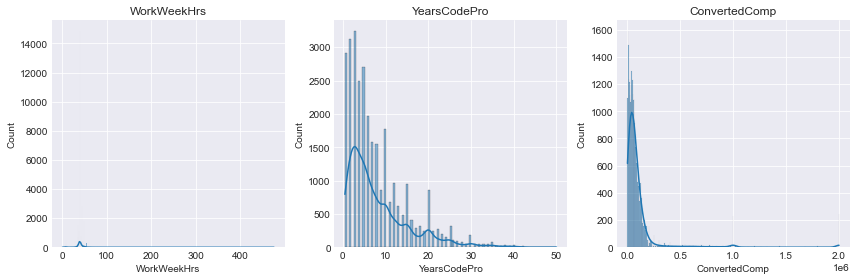

In [26]:
nrows, ncols = 1, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4))

for (idx, col) in enumerate(['WorkWeekHrs', 'YearsCodePro', 'ConvertedComp']):
    ax = axs[idx]
    sns.histplot(data=df3, x=col, kde=True, ax=ax)
    ax.set_title(col, size='large')
    
fig.tight_layout()
plt.show()

* 475 hours per week ???
* Drop `WorkWeekHrs` since the values are suspicious.
* Apply some form of transformation to `YearsCodePro` and `ConvertedComp` since their distributions are exponential.

In [27]:
# drop 'WorkWeekHrs' and 'Employment'
df3 = df3.drop(columns=['WorkWeekHrs', 'Employment'])

# replace the missing values in "YearsCodePro" with the median
df3['YearsCodePro'] = df3['YearsCodePro'].fillna(value=df3['YearsCodePro'].median())

# verify that there's no missing values
# cal_missing_val(df3)

In [28]:
df4 = df3.copy()

# cut off i.e 10th percentile
min_cut_off = np.percentile(df4['ConvertedComp'], 10)

# cut off i.e 96th percentile
max_cut_off = np.percentile(df4['ConvertedComp'], 96)

df4 = df4.loc[(df4['ConvertedComp'] >= min_cut_off) & (df4['ConvertedComp'] <= max_cut_off)]
df4.head()

,Country,EdLevel,DevType,YearsCodePro,ConvertedComp
7,United States,Bachelor’s Degree,Backend Developer,13.0,116000.0
9,United Kingdom,Master’s Degree,Database Administrator,4.0,32315.0
10,United Kingdom,Bachelor’s Degree,Backend Developer,2.0,40070.0
11,Spain,University Dropout,Designer,7.0,14268.0
12,Netherlands,High School,Designer,20.0,38916.0


### Univariate Analysis

In [29]:
df4.describe()

,YearsCodePro,ConvertedComp
count,26058.000000,26058.000000
mean,8.727723,72941.034193
std,7.391593,58334.505782
min,0.500000,9864.000000
25%,3.000000,33744.000000
50%,6.000000,58373.000000
75%,12.000000,94539.000000
max,50.000000,450000.000000


In [30]:
# Apply log transformation
for col in ['YearsCodePro', 'ConvertedComp']:
    df4[col] = df4[col].apply(lambda x: np.log(x+1))

In [31]:
# rename column
df4.rename(columns={'ConvertedComp': 'Salary(USD)'}, inplace=True)

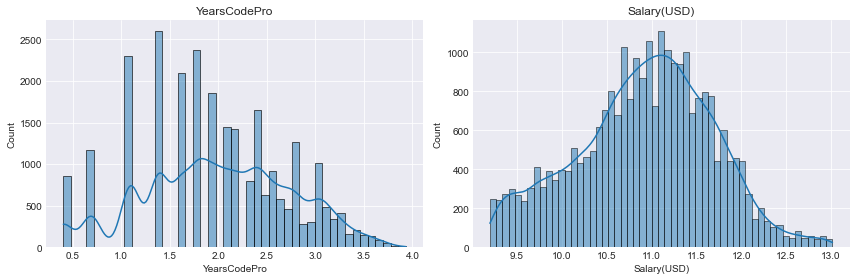

In [32]:
nrows, ncols = 1, 2
fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4))

for (idx, col) in enumerate(['YearsCodePro', 'Salary(USD)']):
    ax = axs[idx]
    sns.histplot(data=df4, x=col, kde=True, ax=ax)
    ax.set_title(col, size='large')
    
fig.tight_layout()
plt.show()

In [33]:
for (col, dtype) in zip(df4.columns, df4.dtypes):
    if dtype == 'O':
        val = df4[col].value_counts()
        print(f"{col}: \n{val}")
        print("===" * 40)

Country: 
United States         7025
Others                6136
United Kingdom        2050
Germany               1882
India                 1245
Canada                1134
France                 940
Brazil                 774
Spain                  651
Netherlands            637
Australia              608
Poland                 546
Italy                  528
Sweden                 504
Russian Federation     486
Israel                 296
Turkey                 278
Switzerland            260
Pakistan                78
Name: Country, dtype: int64
EdLevel: 
Bachelor’s Degree        12549
Master’s Degree           6821
University Dropout        2921
Professional Degree       1267
High School               1009
Post Grad                  953
Less than High School      538
Name: EdLevel, dtype: int64
DevType: 
Backend Developer                             10471
Fullstack Developer                            3404
Database Administrator                         1867
Frontend Developer          

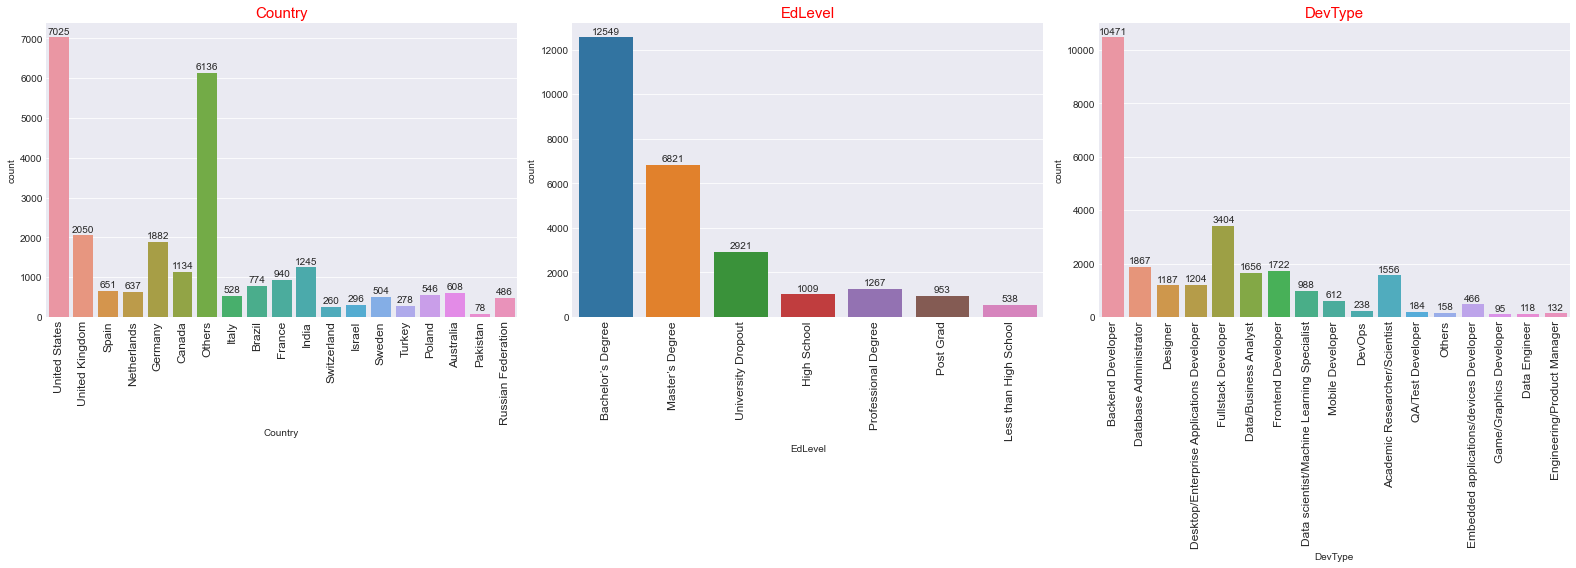

In [34]:
cat_cols = df4.select_dtypes(include='O').columns

nrows, ncols = 1, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(22, 8))

for (idx, col) in enumerate(cat_cols):
#     ax = axs[(idx // ncols), (idx % ncols)]
    ax = axs[idx]
    sns.countplot(data=df4, x=col, ax=ax)
    ax.tick_params(axis='x', labelrotation=90, labelsize=12)
    ax.set_title(col, size=15, color='red')

    for bar in ax.patches:
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        ax.annotate(text=y,                             # text pos
                    xy=(x, y),                          # (x, y)
                    xytext=(0, 6),                      # text position
                    ha='center',                        # horizontal alignment
                    va='center',                        # vertical alignment
                    size=10,                            # text size
                    textcoords='offset points')         # text coordinates???
    
    
fig.tight_layout()
plt.show()

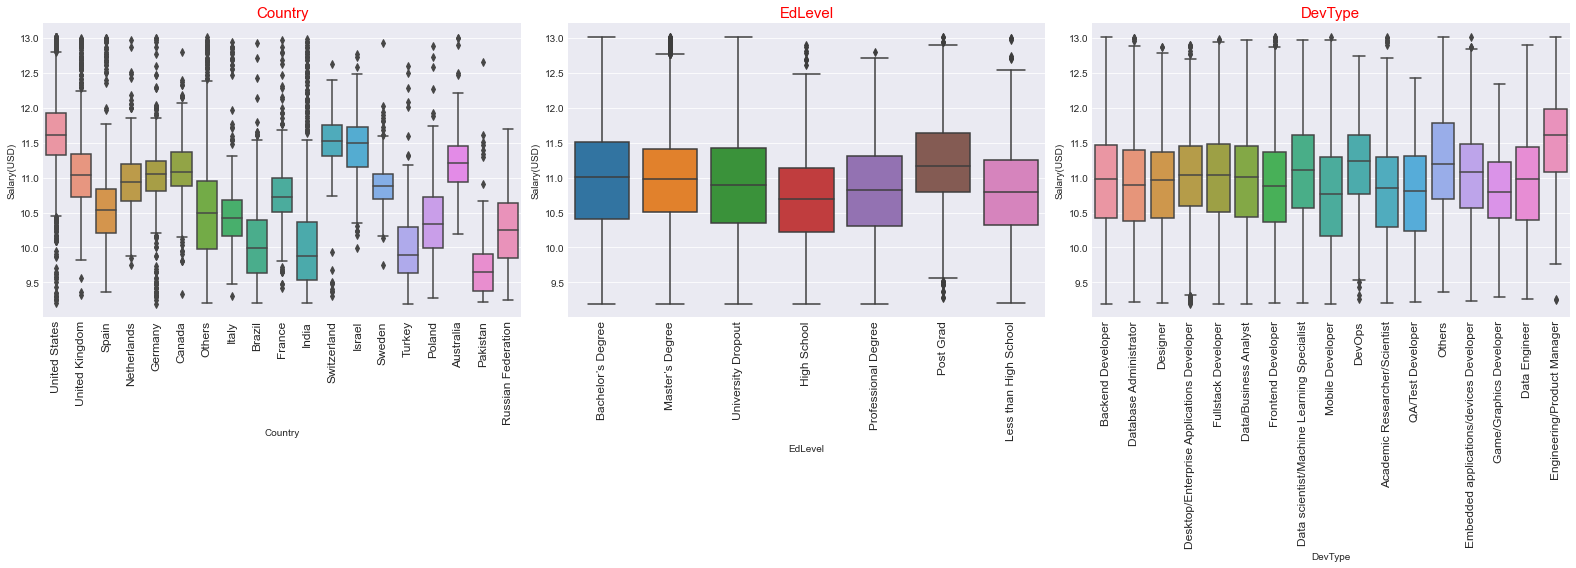

In [35]:
nrows, ncols = 1, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(22, 8))

for (idx, col) in enumerate(cat_cols):
#     ax = axs[(idx // ncols), (idx % ncols)]
    ax = axs[idx]
    sns.boxplot(data=df4, x=col, y='Salary(USD)', ax=ax)
    ax.tick_params(axis='x', labelrotation=90, labelsize=12)
    ax.set_title(col, size=15, color='red')
    
fig.tight_layout()
plt.show()

* The data still contains some outliers.

In [36]:
# Preprocess the data for machine learning algorithms
from sklearn.preprocessing import LabelEncoder

In [37]:
df5 = df4.copy()

# encode Country
le_country = LabelEncoder()
df5['Country'] = le_country.fit_transform(df5['Country'])

# encode EdLevel
le_education = LabelEncoder()
df5['EdLevel'] = le_education.fit_transform(df5['EdLevel'])

# encode DevType
le_devtype = LabelEncoder()
df5['DevType'] = le_devtype.fit_transform(df5['DevType'])

df5 = df5.reset_index(drop=True)
df5.head()

,Country,EdLevel,DevType,YearsCodePro,Salary(USD)
0,18,0,1,2.639057,11.661354
1,17,3,5,1.609438,10.383318
2,17,0,1,1.098612,10.598408
3,13,6,6,2.079442,9.565845
4,8,1,6,3.044522,10.569186


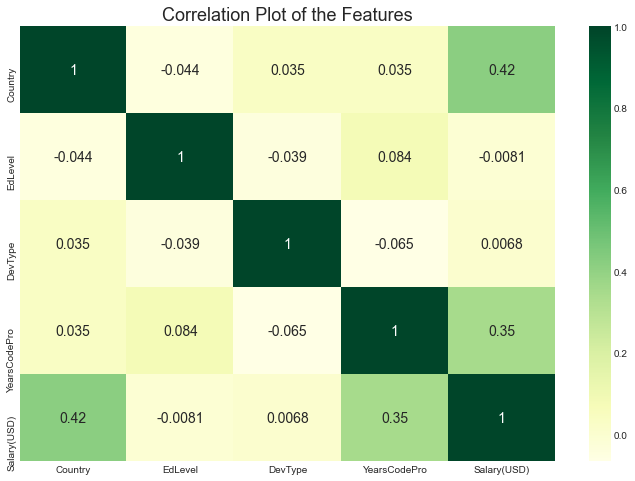

In [38]:
# Correlation Plot
plt.figure(figsize=(12, 8))
data = df5.corr()
sns.heatmap(data=data, annot=True, cmap="YlGn", annot_kws={"size": 14})
plt.title('Correlation Plot of the Features', size=18)

plt.show()

In [39]:
from sklearn.model_selection import train_test_split

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR

# evaluation metrics
from sklearn import metrics

In [40]:
rdm_st = 123
X = df5.drop(columns=['Salary(USD)'])
y = df5['Salary(USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rdm_st)

In [41]:
# models
models = {
    'lin_model': LinearRegression(),
    'lasso_model': Lasso(random_state=rdm_st),
    'ridge_model': Ridge(random_state=rdm_st),
    'dtree': DecisionTreeRegressor(random_state=rdm_st),
    'rf_model': RandomForestRegressor(random_state=rdm_st),
    'ada_boost': AdaBoostRegressor(random_state=rdm_st),
    'svr': SVR(),
}

In [42]:
my_dict = {}
name_list, mae_list, rmse_list = [], [], []
for name, estimator in models.items():
    # fit 
    estimator.fit(X_train, y_train)
    
    # make predictions
    y_pred = estimator.predict(X_test)
    
    # metrics
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    name_list.append(name)
    mae_list.append(mae)
    rmse_list.append(rmse)

    
my_dict['Name'] = name_list
my_dict['Root_Mean_absolute_error'] = mae_list
my_dict['Root_mean_sqd_error'] = rmse_list   
   
my_df = pd.DataFrame(my_dict)
my_df = my_df.sort_values('Root_mean_sqd_error')
my_df

,Name,Root_Mean_absolute_error,Root_mean_sqd_error
4,rf_model,0.382007,0.523187
6,svr,0.416356,0.556106
5,ada_boost,0.429712,0.567902
3,dtree,0.414354,0.571187
2,ridge_model,0.509165,0.639840
0,lin_model,0.509165,0.639840
1,lasso_model,0.567787,0.707879


### Tune the Model

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rf = RandomForestRegressor(random_state=rdm_st)
rf_params = dict(n_estimators=np.arange(90, 142, 10), max_depth=[2, 4, 6, 8, 10, 12, 14, None])
gs_rf = GridSearchCV(rf, rf_params, scoring="neg_mean_absolute_error")

# fit the model
gs_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, None],
                         'n_estimators': array([ 90, 100, 110, 120, 130, 140])},
             scoring='neg_mean_absolute_error')

In [45]:
gs_rf.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=140, random_state=123)

In [46]:
y_pred = gs_rf.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.4941390522256124

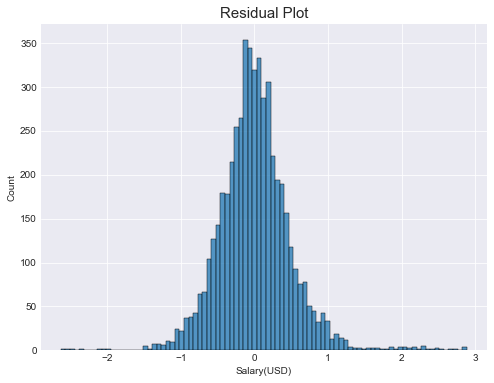

In [47]:
reg = gs_rf.best_estimator_

# Residual plot
residual = (y_test - y_pred)

plt.figure(figsize=(8, 6))
sns.histplot(residual)
plt.title("Residual Plot", size=15)

plt.show()

<hr>

* Feature Importance

In [48]:
# Feature importance
feat_imp = pd.Series(data=reg.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False).reset_index()
feat_imp.columns = ['Features', 'Weights']
feat_imp

,Features,Weights
0,Country,0.748566
1,YearsCodePro,0.188537
2,DevType,0.035053
3,EdLevel,0.027844


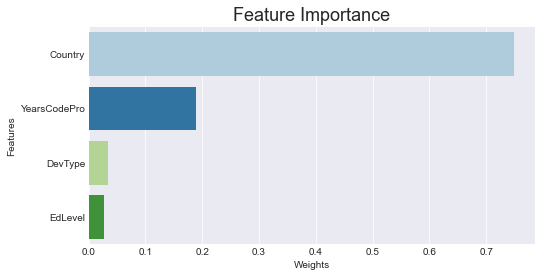

In [49]:
plt.figure(figsize=(8, 4))
sns.barplot(y='Features', x='Weights', data=feat_imp, palette='Paired')
plt.title('Feature Importance', size=18)

plt.show()

In [50]:
# make predictions for new data
#              Country,     Edlevel,           DevType,         YearsCodePro
X = np.array([["Sweden", 'University Dropout', 'Frontend Developer',     5]])  
X

array([['Sweden', 'University Dropout', 'Frontend Developer', '5']],
      dtype='<U18')

In [51]:
# encode Country
X[:, 0] = le_country.transform(X[:, 0])

# encode EdLevel
X[:, 1] = le_education.transform(X[:, 1])

# encode DevType
X[:, 2] = le_devtype.transform(X[:, 2])    

# Apply log transformation to YearsCodePro
X[:, 3] = np.log(int(X[:, 3]) + 1)   

X

array([['14', '6', '11', '1.791759469228055']], dtype='<U18')

In [52]:
pred = reg.predict(X)
salary = np.exp(pred)
salary = round(salary[0], 2)
print(f"Expected Salary is: ${salary:,}")

Expected Salary is: $46,683.55


In [53]:
# Save the model
import pickle

model = dict(regressor=reg, le_country=le_country, le_devtype=le_devtype, le_education=le_education)

with open("./model/model.pkl", "wb") as f:
    pickle.dump(model, f)

In [54]:
# Load the model
with open("./model/model.pkl", "rb") as f:
    estimator = pickle.load(f)

In [55]:
estimator

{'regressor': RandomForestRegressor(max_depth=10, n_estimators=140, random_state=123),
 'le_country': LabelEncoder(),
 'le_devtype': LabelEncoder(),
 'le_education': LabelEncoder()}

In [56]:
regressor = estimator['regressor']
pred = regressor.predict(X)
salary = np.exp(pred)
salary = round(salary[0], 2)
print(f"Expected Salary is: ${salary:,}")

Expected Salary is: $46,683.55
